In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('ar41_for_ulb_merged.csv', sep=';', parse_dates=True, index_col="timestamps_UTC")

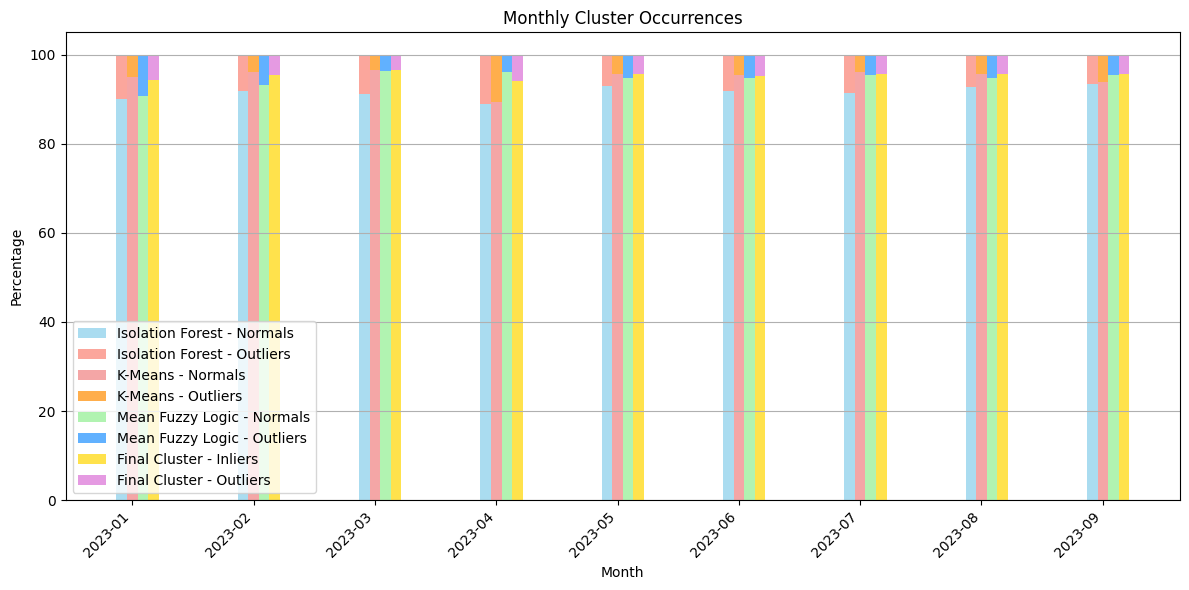

In [9]:
monthly_clusters_iso = (
    df.groupby([df.index.to_period("M"), "isolation_forest"]).size().unstack(fill_value=0)
)
monthly_percentages_iso = monthly_clusters_iso.div(monthly_clusters_iso.sum(axis=1), axis=0) * 100
monthly_percentages_iso = monthly_percentages_iso.round(2)

monthly_clusters_fuzzy = (
    df.groupby([df.index.to_period("M"), "fuzzy"]).size().unstack(fill_value=None)
)
monthly_percentages_fuzzy = monthly_clusters_fuzzy.div(monthly_clusters_fuzzy.sum(axis=1), axis=0) * 100
monthly_percentages_fuzzy = monthly_percentages_fuzzy.round(2)

monthly_clusters_kmean = (
    df.groupby([df.index.to_period("M"), "kmean"]).size().unstack(fill_value=None)
)
monthly_percentages_kmean = monthly_clusters_kmean.div(monthly_clusters_kmean.sum(axis=1), axis=0) * 100
monthly_percentages_kmean = monthly_percentages_kmean.round(2)

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
x = np.arange(len(monthly_percentages_iso.index))  # Use numpy array for better control of positions

final_clusters = df.groupby([df.index.to_period("M"), "combined"]).size().unstack(fill_value=0)
final_percentages = final_clusters.div(final_clusters.sum(axis=1), axis=0) * 100
final_percentages = final_percentages.round(2)

# Plotting Isolation Forest clusters
ax.bar(
    x - bar_width / 4,
    monthly_percentages_iso[0],
    width=bar_width / 4,
    color="skyblue",
    alpha=0.7,
    label="Isolation Forest - Normals",
)
ax.bar(
    x - bar_width / 4,
    monthly_percentages_iso[1],
    width=bar_width / 4,
    color="salmon",
    alpha=0.7,
    bottom=monthly_percentages_iso[0],
    label="Isolation Forest - Outliers",
)
# Plotting K-Means clusters
ax.bar(
    x,
    monthly_percentages_kmean[0],
    width=bar_width / 4,
    color="lightcoral",
    alpha=0.7,
    label="K-Means - Normals",
)
ax.bar(
    x,
    monthly_percentages_kmean[1],
    width=bar_width / 4,
    color="darkorange",
    alpha=0.7,
    bottom=monthly_percentages_kmean[0],
    label="K-Means - Outliers"
)
# Plotting Mean Fuzzy Logic clusters
ax.bar(
    x + bar_width / 4,
    monthly_percentages_fuzzy[0],
    width=bar_width / 4,
    color="lightgreen",
    alpha=0.7,
    label="Mean Fuzzy Logic - Normals",
)
ax.bar(
    x + bar_width / 4,
    monthly_percentages_fuzzy[1],
    width=bar_width / 4,
    color="dodgerblue",
    alpha=0.7,
    bottom=monthly_percentages_fuzzy[0],
    label="Mean Fuzzy Logic - Outliers",
)
# Plotting Final Cluster column
ax.bar(
    x + 2 * bar_width/4,
    final_percentages[0],
    width=bar_width / 4,
    color="gold",
    alpha=0.7,
    label="Final Cluster - Inliers",
)
ax.bar(
    x + 2 * bar_width/4,
    final_percentages[1],
    width=bar_width / 4,
    color="orchid",
    alpha=0.7,
    bottom=final_percentages[0],
    label="Final Cluster - Outliers",
)

ax.set_xlabel("Month")
ax.set_ylabel("Percentage")
ax.set_title("Monthly Cluster Occurrences")
ax.legend()
ax.grid(axis="y")

plt.xticks(x, monthly_percentages_iso.index.strftime("%Y-%m"), rotation=45, ha="right")
plt.tight_layout()

plt.show()

In [10]:
print(f'Total number of rows: {len(df)}')
print(f'Total of isolation forest outliers : {df["isolation_forest"].sum()} ({df["isolation_forest"].sum()/len(df)*100:.2f}%)')
print(f'Total of fuzzy logic outliers : {df["fuzzy"].sum()} ({df["fuzzy"].sum()/len(df)*100:.2f}%)')
print(f'Total of kmeans outliers : {df["kmean"].sum()} ({df["kmean"].sum()/len(df)*100:.2f}%)')
# total (combined)
print(f'Total of combined outliers : {df["combined"].sum()} ({df["combined"].sum()/len(df)*100:.2f}%)')


Total number of rows: 17096900
Total of isolation forest outliers : 1439592 (8.42%)
Total of fuzzy logic outliers : 883543 (5.17%)
Total of kmeans outliers : 854845 (5.00%)
Total of combined outliers : 777181 (4.55%)
